# Домашнее задание 2 - Компьютерное зрение

Для решения ДЗ вам очень помогут семинары 3 и 4 занятий

Напоминаю, как сдаем дз
1. Копируем этот ноутбук (Файл -> Сохранить копию на Диске)
2. **Пишем свой ТГ**, чтобы легче было потом связаться. О результатах проверки сообщим в личные сообщения в телеграме!
3. Листаем, заполняем пропущенные ячейки, выполняем задания
4. Когда закончите - в левом верхнем углу нажимаете Поделиться, в общем доступе обязательно указываем "Все, у кого есть ссылка", далее нажимаем Копировать ссылку и прикладываем ссылку на степик в ответ к дз
5. Ждем фидбек в тг)

#### Дедлайн сдачи ДЗ
**26 октября 23:59** очень прошу не опаздывать! Фидбек начнем рассылать после дедлайна дз, постараемся все проверить до дедлайна следующего ДЗ

#### Задачи
1. Имплементируем операцию свертки на Numpy<br>
2. Угадываем персонажа из симпсонов <br>

Всего можно получить 10 баллов + доп. баллы по настроению проверяющего)) <br>
По всем вопросам: @daniil_d_d <br>
**Удачи!**

# Задача 1. Имплементируем операцию свертки на Numpy

Вам предстоит реализовать операцию свертки, которую мы обсуждали на лекции. <br>
Кому нужно вспомнить, что это такое: https://youtu.be/xWMCjHj7gWU?si=WysBWUdfTzjw_Y1W <br>
Или текстом: https://education.yandex.ru/handbook/ml/article/svyortochnye-nejroseti

Кому сложно с numpy -> смотрим 1-2 семинары, их ноутбуки <br>
а еще смотрим такой гайд https://numpy.org/doc/stable/user/absolute_beginners.html <br>
ну и на крайняк идем в чат)

Решение нужно реализовать на numpy, без использования других библиотек. Будем сравнивать ваш код с реализацией на pytorch)
Важно понимать, что numpy очень оптимизирован под тензорные вычисления, операции с матрицами. Поэтому, ваше решение будет также оцениваться на эффективность кода, вот некоторые подсказки https://www.slingacademy.com/article/how-to-optimize-numpy-code-for-performance/

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F

image = np.array([
    [1, 2, 0, 3, 1],
    [4, 1, 0, 1, 7],
    [2, 3, 2, 1, 0],
    [0, 1, 3, 1, 2],
    [1, 2, 1, 0, 1]
], dtype=float)


kernel = np.array([
    [1, 2, -1],
    [0, 3, 2],
    [1, 4, -1]
], dtype=float)

def conv2d_numpy(x: np.ndarray, w: np.ndarray, stride: int = 1, padding: int = 0) -> np.ndarray:
    """
    Выполняет 2D свёртку входного изображения с заданным ядром (kernel)

    Params:
    x : np.ndarray
        Входное изображение размером (H, W), где
        H — высота, W — ширина.
    w : np.ndarray
        Ядро свёртки (фильтр) размером (kH, kW), где
        kH — высота фильтра, kW — ширина фильтра.
    stride : int, optional (по умолчанию 1)
        Шаг, с которым ядро перемещается по изображению.
    padding : int, optional (по умолчанию 0)
        Количество нулевых пикселей, добавляемых по всем краям изображения.

    Возвращает
    ----------
    np.ndarray
        Результат свёртки
    """

    # Your code here :)
    x = np.pad(x, pad_width=padding)

    # размер изображения
    H, W = x.shape

    # размер ядра
    kH, kW = w.shape

    # размер выходного изображения
    Hout = (H - kH) // stride + 1
    Wout = (W - kW) // stride + 1

    # выходная матрица (нулевая по умолчанию)
    out = np.zeros((Hout, Wout))

    for i in range(Hout):
        for j in range(Wout):
            field = x[i * stride:i * stride + kH, j * stride:j * stride + kW]
            out[i, j] = np.sum(field * w)

    return out

Это просто тесты, которые проверят корректность твоего решения) Внимательно читай текст ошибки

In [ ]:
# Самый базовый случай, без паддинга
stride, padding = 1, 0
print(f"\nTest 1: stride={stride}, padding={padding}")
out_numpy = conv2d_numpy(image, kernel, stride=stride, padding=padding)
out_torch = F.conv2d(
    torch.tensor(image).unsqueeze(0).unsqueeze(0).float(),
    torch.tensor(kernel).unsqueeze(0).unsqueeze(0).float(),
    stride=stride, padding=padding
)
assert np.allclose(out_numpy, out_torch.squeeze().numpy()), "Test 1 не прошел, неверно реализовали свертку"
print("Test 1 пройден")


# Проверка страйда > 1
stride, padding = 2, 0
print(f"\nTest 2: stride={stride}, padding={padding}")
out_numpy = conv2d_numpy(image, kernel, stride=stride, padding=padding)
out_torch = F.conv2d(
    torch.tensor(image).unsqueeze(0).unsqueeze(0).float(),
    torch.tensor(kernel).unsqueeze(0).unsqueeze(0).float(),
    stride=stride, padding=padding
)
assert np.allclose(out_numpy, out_torch.squeeze().numpy()), "Test 2 не прошел, проверь как сдвигаешь окна, размер выходов"
print("Test 2 пройден")


# Проверяем как реализованы паддинги
stride, padding = 1, 1
print(f"\nTest 3: stride={stride}, padding={padding}")
out_numpy = conv2d_numpy(image, kernel, stride=stride, padding=padding)
out_torch = F.conv2d(
    torch.tensor(image).unsqueeze(0).unsqueeze(0).float(),
    torch.tensor(kernel).unsqueeze(0).unsqueeze(0).float(),
    stride=stride, padding=padding
)
assert np.allclose(out_numpy, out_torch.squeeze().numpy()), "Test 3 не прошел, проверь как реализованы падинги"
print("Test 3 пройден")


# А теперь комбинация большого паддинга и stride
stride, padding = 2, 2
print(f"\nTest 4: stride={stride}, padding={padding}")
out_numpy = conv2d_numpy(image, kernel, stride=stride, padding=padding)
out_torch = F.conv2d(
    torch.tensor(image).unsqueeze(0).unsqueeze(0).float(),
    torch.tensor(kernel).unsqueeze(0).unsqueeze(0).float(),
    stride=stride, padding=padding
)
assert np.allclose(out_numpy, out_torch.squeeze().numpy()), "Test 4 не прошел, проверь размерности выхода, ошибки в сдвигах, падингах"
print("Test 4 пройден")



Test 1: stride=1, padding=0
Test 1 пройден

Test 2: stride=2, padding=0
Test 2 пройден

Test 3: stride=1, padding=1
Test 3 пройден

Test 4: stride=2, padding=2
Test 4 пройден


# Задача 2. Угадываем персонажа из симпсонов

Вам предстоит реализовать классификатор - сверточную нейросеть для предсказания персонажа из мультика про симпсонов по фото героев)

После этого, возьмем готовый предобученный класификатор, попробуем его дообучить и сравним с первым решением)

Советуем включить вычисления на GPU (видеокарте). В Google Colab это можно сделать так: Среда выполнения -> сменить среду выполнения -> выбираем все, что доступно, кроме CPU (ЦП) и TPU (это тензорный процессор от гугла, кому интересно, спросите в чате, расскажу). Например можно выбрать T4 (кажется по дефолту только он и доступен

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms
from torchvision import datasets, models, transforms

import PIL
from PIL import Image

import math
import random
import seaborn as sn
import pandas as pd
import numpy as np
from pathlib import Path
from skimage import io
import pickle
import matplotlib.pyplot as plt
import time
import os
import copy
from tqdm import tqdm_notebook
import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [2]:
# Скачиваем данные, работает в Google Colab, если хотите запустить на Kaggle или локально - удачи!
# но если что пишите в чат конечно же)

# если просит давать доступ к гугл диску - давайте, ставьте все галочки)))

In [3]:
!gdown --remaining-ok 1OHYqvP8T7M5N14Tvg8DcgXaohTWyLfh1 -O /content/simpsons_dataset.tar
!mkdir -p /content/simpson_dataset
!tar -xf "/content/simpsons_dataset.tar" -C "/content/simpson_dataset"

Downloading...
From (original): https://drive.google.com/uc?id=1OHYqvP8T7M5N14Tvg8DcgXaohTWyLfh1
From (redirected): https://drive.google.com/uc?id=1OHYqvP8T7M5N14Tvg8DcgXaohTWyLfh1&confirm=t&uuid=c3a2dfe1-21bd-4a90-8c8c-ccd6c769dcb3
To: /content/simpsons_dataset.tar
100% 522M/522M [00:10<00:00, 49.5MB/s]


In [4]:
!gdown --remaining-ok 1m38V-OfxLrRwJqd3Iw2UpMJ9ugRIcFAz -O /content/kaggle_simpson_testset.zip
!mkdir -p /content/kaggle_simpson_testset
!unzip -q /content/kaggle_simpson_testset.zip -d /content/kaggle_simpson_testset

Downloading...
From: https://drive.google.com/uc?id=1m38V-OfxLrRwJqd3Iw2UpMJ9ugRIcFAz
To: /content/kaggle_simpson_testset.zip
100% 11.2M/11.2M [00:00<00:00, 29.6MB/s]


Теперь собираем датасет, тут в целом ничего интересного пока

In [5]:
train_dir = Path('/content/simpson_dataset/')
test_dir = Path('/content/kaggle_simpson_testset/kaggle_simpson_testset/')

In [6]:
class SimpsonTrainValPath():

  def __init__(self, train_dir, test_dir):

    self.train_dir = train_dir
    self.test_dir = test_dir
    self.train_val_files_path = sorted(list(self.train_dir.rglob('*.jpg')))
    self.test_path = sorted(list(self.test_dir.rglob('*.jpg')))
    self.train_val_labels = [path.parent.name for path in self.train_val_files_path]

  def get_path(self):

    train_files_path, val_files_path = train_test_split(self.train_val_files_path, test_size = 0.3, \
                                          stratify=self.train_val_labels)

    files_path = {'train': train_files_path, 'val': val_files_path}

    return files_path, self.test_path

  def get_n_classes(self):
    return len(np.unique(self.train_val_labels))

In [7]:
import re
from typing import List, Optional

def extract_label_from_filename(filename: str) -> str:
    """
    Извлекает лейбл из имени файла формата:
    'abraham_grampa_simpson_0.jpg' → 'abraham_grampa_simpson'
    """
    stem = Path(filename).stem
    match = re.match(r"^(.*)_(\d+)$", stem)
    return match.group(1) if match else stem

class SimpsonsDataset(Dataset):
    def __init__(self, files_path, data_transforms, is_test=False, label_encoder=None):
        self.files_path = files_path
        self.transform = data_transforms
        self.is_test = is_test

        if not is_test:
            self.labels_str = [p.parent.name for p in self.files_path]
        else:
            self.labels_str = [extract_label_from_filename(p.name) for p in self.files_path]

        if label_encoder is None:
            self.label_encoder = LabelEncoder()
            self.label_encoder.fit(self.labels_str)
        else:
            self.label_encoder = label_encoder

    def __len__(self):
        return len(self.files_path)

    def __getitem__(self, idx):
        img_path = self.files_path[idx]
        image = Image.open(img_path).convert("RGB")
        image = self.transform(image)

        label_str = self.labels_str[idx]
        label = self.label_encoder.transform([label_str]).item()

        return image, label

Здесь делаем трансформ в данных, препроцессинг

In [8]:
input_size = (256, 256)

data_transforms = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # https://stackoverflow.com/questions/58151507/why-pytorch-officially-use-mean-0-485-0-456-0-406-and-std-0-229-0-224-0-2
    ])

In [9]:
train_val_paths, test_path = SimpsonTrainValPath(train_dir, test_dir).get_path()

image_datasets = {
    mode: SimpsonsDataset(train_val_paths[mode], data_transforms, is_test=False)
    for mode in ['train', 'val']
}

n_classes = len(image_datasets["train"].label_encoder.classes_)

image_datasets_test = SimpsonsDataset(
    test_path,
    data_transforms,
    is_test=True,
    label_encoder=image_datasets["train"].label_encoder
)

In [10]:
image_datasets["train"].label_encoder.classes_

array(['abraham_grampa_simpson', 'agnes_skinner',
       'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson',
       'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum',
       'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel',
       'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson',
       'kent_brockman', 'krusty_the_clown', 'lenny_leonard',
       'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson',
       'martin_prince', 'mayor_quimby', 'milhouse_van_houten',
       'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz',
       'otto_mann', 'patty_bouvier', 'principal_skinner',
       'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum',
       'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird',
       'troy_mcclure', 'waylon_smithers'], dtype='<U24')

In [11]:
batch_size = 32
dataloaders_dict = {'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4),
                    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=True, num_workers=4)}
dataloader_test = torch.utils.data.DataLoader(image_datasets_test, batch_size=batch_size, shuffle=False, num_workers=4)

In [12]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

Взглянем на данные наконец)

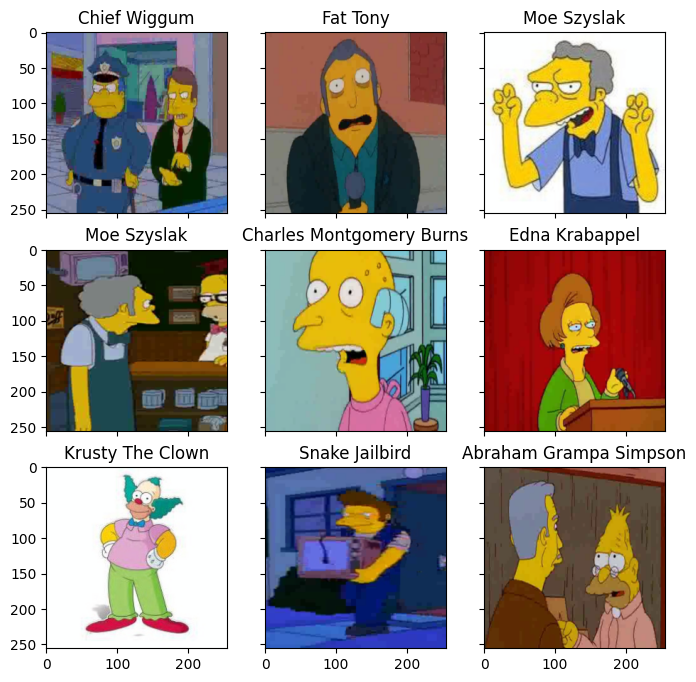

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, 4500))
    im_val, label = image_datasets['train'][random_characters]
    # inverse_transform это метод LabelEncoder(), мы закодировали цифрами классы, с помощью inverse_transform из чисел вернём название класса
    # получаем имя персонажа с заглавных букв
    img_label = " ".join(map(lambda x: x.capitalize(),\
                image_datasets['val'].label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Ну теперь сам наконец-то)

Нужно реализовать простенькую CNN (на самом деле можете какую угодно сколько сложную CNN реализовать). Что важно: на вход должна передаваться трех-канальная картинка размером (input_size, input_size). На выходе должен быть вектор длинной num_classes, то есть должны получаться логиты для каждого класса.

При этом конечно мы ожидаем, что вы поработаете с операциями свертки) Можете попробовать реализовать residual connection (https://arxiv.org/pdf/1512.03385 или https://habr.com/ru/companies/slsoft/articles/855602/)

In [14]:
class SimpsonsClassifier(nn.Module):
    """
    Простая CNN-модель для классификации персонажей Симпсонов.
    Подходит для входных изображений квадратного размера (input_size x input_size).
    """

    def __init__(self, input_size: int, num_classes: int):
        super(SimpsonsClassifier, self).__init__() # зачем это кстати? - инициализируем родительский класс

        # Your code here
        # 1й сверточный слой
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(32)

        # 2й сверточный слой
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.bn2 = nn.BatchNorm2d(64)

        # 3й сверточный слой
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=0)
        self.bn3 = nn.BatchNorm2d(128)

        # 4й сверточный слой
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=0)
        self.bn4 = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(2, 2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4)) # для решения проблемы несовпадения входных изображений

        # Полносвязные слои
        self.l1 = nn.Linear(256 * 4 * 4, 512)
        self.drop = nn.Dropout(0.5)
        self.l2 = nn.Linear(512, num_classes)

    def forward(self, x):

        # Your code here
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.adaptive_pool(F.relu(self.bn4(self.conv4(x))))

        x = x.view(x.size(0), -1)

        x = self.drop(F.relu(self.l1(x)))
        out = self.l2(x)

        return out


In [15]:
def visualization(train, val, is_loss = True):

  if is_loss:
    plt.figure(figsize=(17,10))
    plt.plot(train, label = 'Training loss')
    plt.plot(val, label = 'Val loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

  else:
    plt.figure(figsize=(17,10))
    plt.plot(train, label = 'Training acc')
    plt.plot(val, label = 'Val acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

In [16]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    """
    Базовый цикл обучения и валидации PyTorch-модели с переносом на выбранное устройство (CPU/GPU).

    Параметры
    ----------
    model : torch.nn.Module
        Обучаемая модель.
    dataloaders : dict
        Словарь с двумя ключами: 'train' и 'val'.
        Каждое значение — это DataLoader для соответствующей выборки.
    criterion : torch.nn.Module
    optimizer : torch.optim.Optimizer
    num_epochs : int, optional
        Количество эпох обучения (по умолчанию 25).

    Возвращает
    ----------
    model : torch.nn.Module
        Обученная модель (с весами после последней эпохи).
    history_val : dict
        История валидации: {'loss': [...], 'acc': [...]} по эпохам.
    history_train : dict
        История обучения: {'loss': [...], 'acc': [...]} по эпохам.
    """
    # Автоматически определяем устройство
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Переносим модель на устройство
    model = model.to(device)

    history_val = {'loss': [], 'acc': []}
    history_train = {'loss': [], 'acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 20)

        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()

            running_loss = 0.0 # сюда складываем лосс для каждого сэмпла
            running_corrects = 0 # сюда складываем число верно угаданных (для подсчета accuracy)
            total_samples = 0

            for inputs, labels in tqdm.tqdm(dataloaders[phase], desc=phase):

                # Your code here
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += inputs.size(0)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history_train['loss'].append(epoch_loss)
                history_train['acc'].append(epoch_acc.item())
            else:
                history_val['loss'].append(epoch_loss)
                history_val['acc'].append(epoch_acc.item())

        print()

    return model, history_val, history_train

In [17]:
model = SimpsonsClassifier(input_size[0], n_classes)
criterion = nn.CrossEntropyLoss() # your code
optimizer = optim.Adam(model.parameters(), lr=0.001) # your code

Ну наконец-то обучаемся (если вы все правильно сделали конечно же)

In [18]:
model, history_val, history_train = train_model(model, dataloaders_dict, criterion, optimizer, num_epochs=15)

Using device: cuda
Epoch 1/15
--------------------


train: 100%|██████████| 458/458 [01:19<00:00,  5.78it/s]


train Loss: 2.2691 Acc: 0.3923


val: 100%|██████████| 197/197 [00:27<00:00,  7.11it/s]


val Loss: 1.7464 Acc: 0.5287

Epoch 2/15
--------------------


train: 100%|██████████| 458/458 [01:14<00:00,  6.17it/s]


train Loss: 1.7496 Acc: 0.5237


val: 100%|██████████| 197/197 [00:28<00:00,  6.99it/s]


val Loss: 1.3975 Acc: 0.6194

Epoch 3/15
--------------------


train: 100%|██████████| 458/458 [01:14<00:00,  6.12it/s]


train Loss: 1.4620 Acc: 0.5914


val: 100%|██████████| 197/197 [00:27<00:00,  7.21it/s]


val Loss: 1.2694 Acc: 0.6672

Epoch 4/15
--------------------


train: 100%|██████████| 458/458 [01:11<00:00,  6.45it/s]


train Loss: 1.2668 Acc: 0.6416


val: 100%|██████████| 197/197 [00:29<00:00,  6.75it/s]


val Loss: 1.0803 Acc: 0.6960

Epoch 5/15
--------------------


train: 100%|██████████| 458/458 [01:11<00:00,  6.37it/s]


train Loss: 1.1102 Acc: 0.6840


val: 100%|██████████| 197/197 [00:28<00:00,  7.02it/s]


val Loss: 0.9335 Acc: 0.7513

Epoch 6/15
--------------------


train: 100%|██████████| 458/458 [01:12<00:00,  6.35it/s]


train Loss: 0.9918 Acc: 0.7179


val: 100%|██████████| 197/197 [00:28<00:00,  6.93it/s]


val Loss: 0.8470 Acc: 0.7693

Epoch 7/15
--------------------


train: 100%|██████████| 458/458 [01:13<00:00,  6.22it/s]


train Loss: 0.9103 Acc: 0.7379


val: 100%|██████████| 197/197 [00:28<00:00,  6.97it/s]


val Loss: 0.8085 Acc: 0.7772

Epoch 8/15
--------------------


train: 100%|██████████| 458/458 [01:12<00:00,  6.32it/s]


train Loss: 0.8040 Acc: 0.7676


val: 100%|██████████| 197/197 [00:28<00:00,  6.95it/s]


val Loss: 0.7266 Acc: 0.8061

Epoch 9/15
--------------------


train: 100%|██████████| 458/458 [01:11<00:00,  6.42it/s]


train Loss: 0.7310 Acc: 0.7868


val: 100%|██████████| 197/197 [00:30<00:00,  6.48it/s]


val Loss: 0.6844 Acc: 0.8145

Epoch 10/15
--------------------


train: 100%|██████████| 458/458 [01:10<00:00,  6.49it/s]


train Loss: 0.6796 Acc: 0.7991


val: 100%|██████████| 197/197 [00:27<00:00,  7.05it/s]


val Loss: 0.6471 Acc: 0.8234

Epoch 11/15
--------------------


train: 100%|██████████| 458/458 [01:11<00:00,  6.37it/s]


train Loss: 0.6022 Acc: 0.8213


val: 100%|██████████| 197/197 [00:27<00:00,  7.08it/s]


val Loss: 0.6564 Acc: 0.8291

Epoch 12/15
--------------------


train: 100%|██████████| 458/458 [01:13<00:00,  6.27it/s]


train Loss: 0.5627 Acc: 0.8324


val: 100%|██████████| 197/197 [00:28<00:00,  7.01it/s]


val Loss: 0.6216 Acc: 0.8377

Epoch 13/15
--------------------


train: 100%|██████████| 458/458 [01:10<00:00,  6.47it/s]


train Loss: 0.5233 Acc: 0.8441


val: 100%|██████████| 197/197 [00:28<00:00,  6.94it/s]


val Loss: 0.6397 Acc: 0.8361

Epoch 14/15
--------------------


train: 100%|██████████| 458/458 [01:12<00:00,  6.36it/s]


train Loss: 0.4756 Acc: 0.8575


val: 100%|██████████| 197/197 [00:27<00:00,  7.16it/s]


val Loss: 0.5535 Acc: 0.8557

Epoch 15/15
--------------------


train: 100%|██████████| 458/458 [01:10<00:00,  6.47it/s]


train Loss: 0.4341 Acc: 0.8654


val: 100%|██████████| 197/197 [00:27<00:00,  7.10it/s]

val Loss: 0.5869 Acc: 0.8521



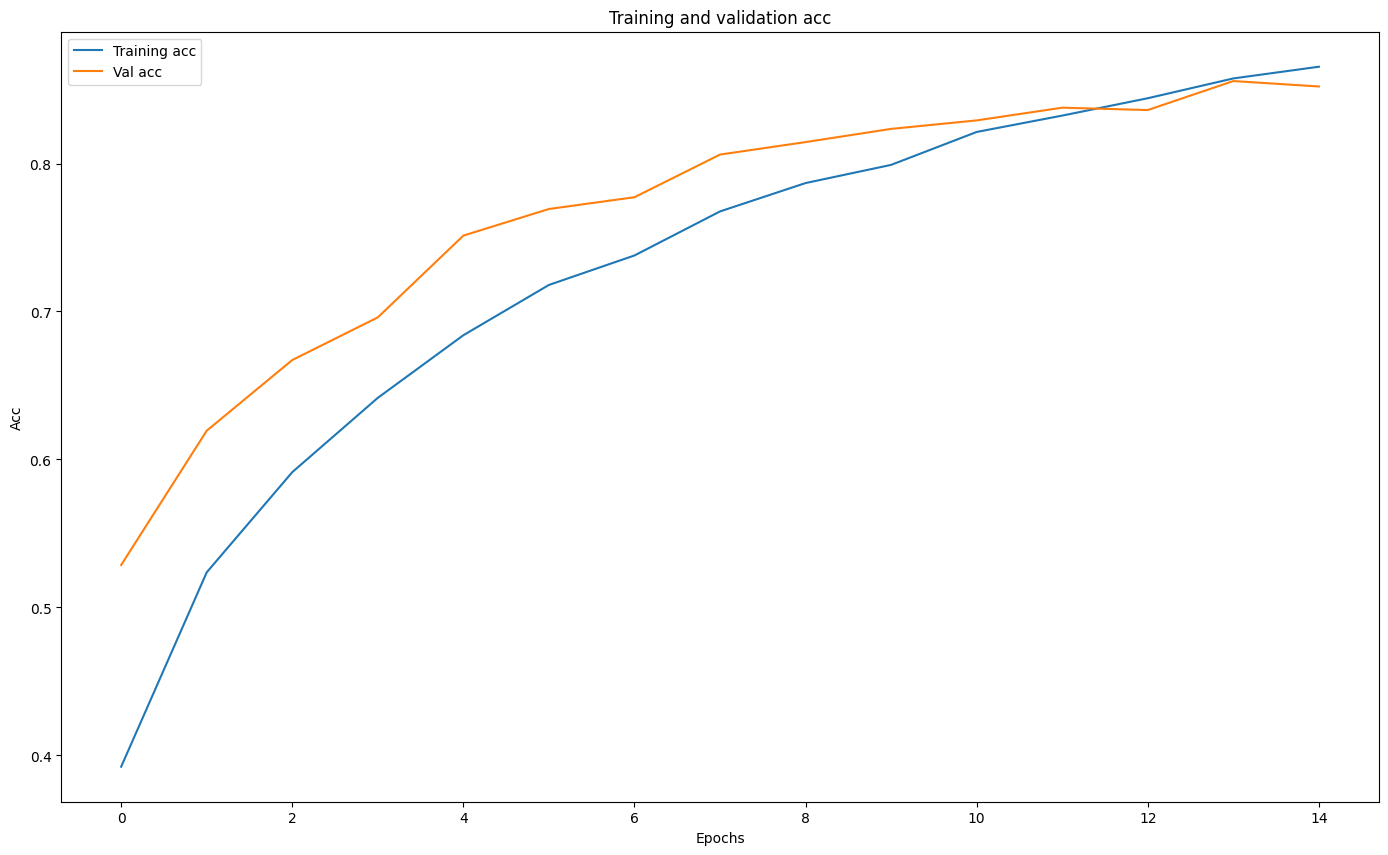

In [19]:
# смотрим точность в каждую из эпох на трейне и тесте
visualization(history_train["acc"], history_val["acc"], is_loss = False)

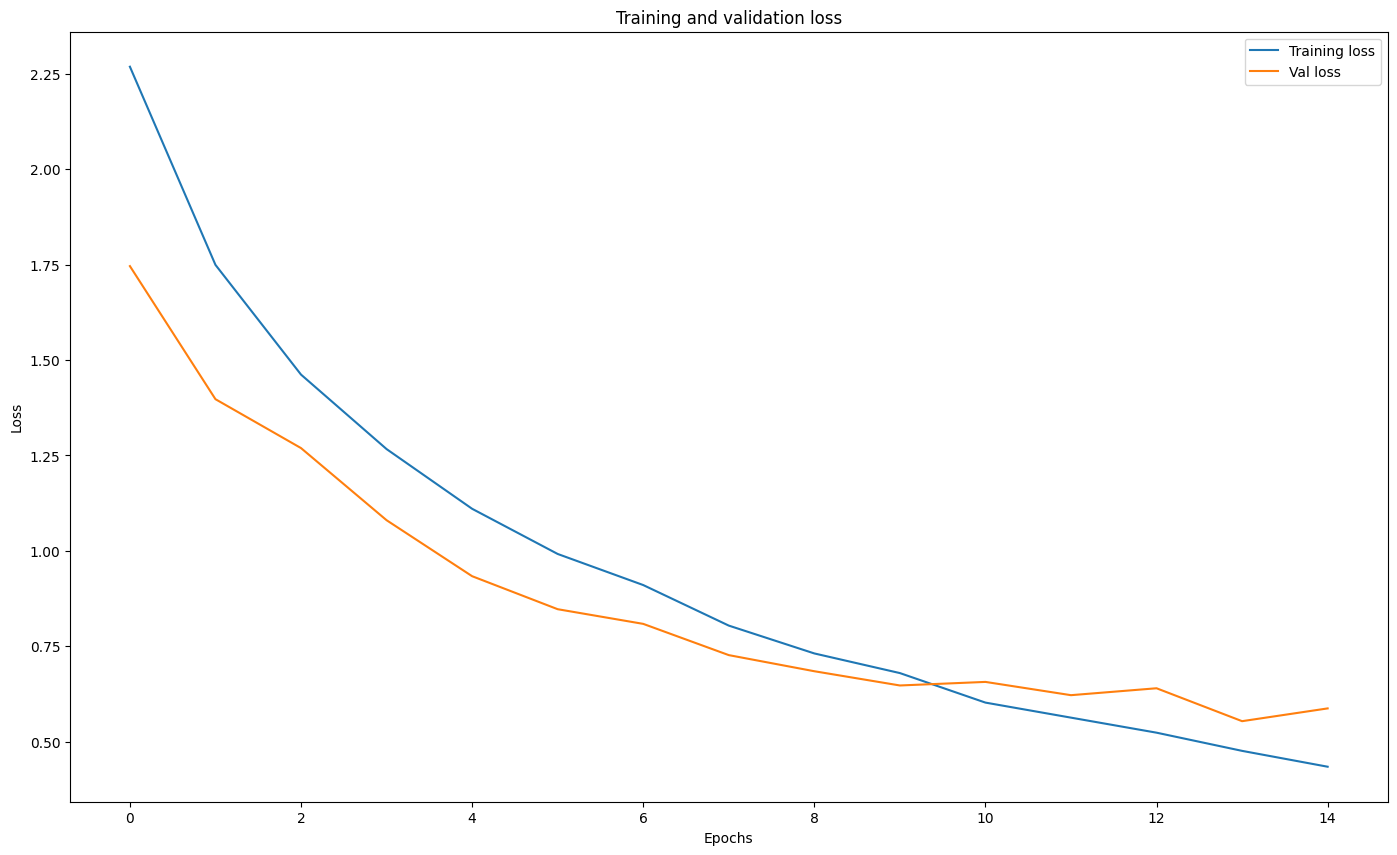

In [20]:
# смотрим лосс в каждую из эпох на трейне и тесте
visualization(history_train["loss"], history_val["loss"], is_loss = True)

In [21]:
def predict_one_sample(model, img_tensor, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")) -> np.ndarray:
    """
    Функция возвращает np массив вероятностей пренадлежности к каждому из классов по картинке img_tensor.
    То есть вам на вход модели надо передать img_tensor, получить логиты, и не забыть применить softmax, чтобы получить вероятности)
    """
    with torch.no_grad():

        # Your code here
        if img_tensor.dim() == 3:
            img_tensor = img_tensor.unsqueeze(0).to(device)
        elif img_tensor.dim() == 4:
            img_tensor = img_tensor.to(device)
        else:
            raise ValueError(f"Неожиданная размерность тензора: {img_tensor.dim()}")

        logits = model(img_tensor)
        probabilities = F.softmax(logits, dim=1)
        y_pred = probabilities.cpu().numpy()[0]

    return y_pred

In [22]:
num_classes = len(image_datasets["train"].label_encoder.classes_)

In [23]:
test_model = SimpsonsClassifier(input_size=64, num_classes=num_classes).to(torch.device("cuda"))

# Один фейковый образец
x = torch.randn(3, 64, 64).to(torch.device("cuda"))  # C x H x W

# 1. Проверка типа и формы выхода
probs = predict_one_sample(model, x)
assert isinstance(probs, np.ndarray), "Выход должен быть np.ndarray"
assert probs.shape == (num_classes,), f"Ожидалась форма ({num_classes},), а получили {probs.shape}"
print("Тест 1: форма и тип выхода корректны")

# 2. Проверка, что вероятности суммируются в 1
s = probs.sum()
assert np.isclose(s, 1.0, atol=1e-5), f"Сумма вероятностей должна быть 1, а сейчас {s}"
print("Тест 2: сумма вероятностей = 1")

# 3. Проверка, что нет отрицательных вероятностей
assert np.all(probs >= 0), "Вероятности не могут быть отрицательными"
print("Тест 3: все вероятности >= 0")

Тест 1: форма и тип выхода корректны
Тест 2: сумма вероятностей = 1
Тест 3: все вероятности >= 0


In [24]:
def predict(model, dataloader, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")) -> np.ndarray:
    """
    Делает предсказания для всего даталоадера. Нужно проитерироваться по даталоадеру, получить предикты модели (только класс в виде числа, через argmax),
    сложить все предсказания в preds и вернуть мне его в виде np.ndarray.
    """
    preds = []
    model.eval()

    with torch.no_grad():

      # Your code here
      for inputs, _ in dataloader:
          inputs = inputs.to(device)
          outputs = model(inputs)
          _, predicted = torch.max(outputs, 1)
          preds.extend(predicted.cpu().numpy())

    return preds


def build_confusion_matrix(model, dataloader, true_labels, class_names, device):
    """
    Строит confusion matrix по предсказаниям модели и реальным меткам.
    """
    preds = predict(model, dataloader, device)
    cm = sk_confusion_matrix(true_labels, preds)

    plt.subplots(figsize=(20,20))
    sn.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar=False,
        vmax = 30,
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


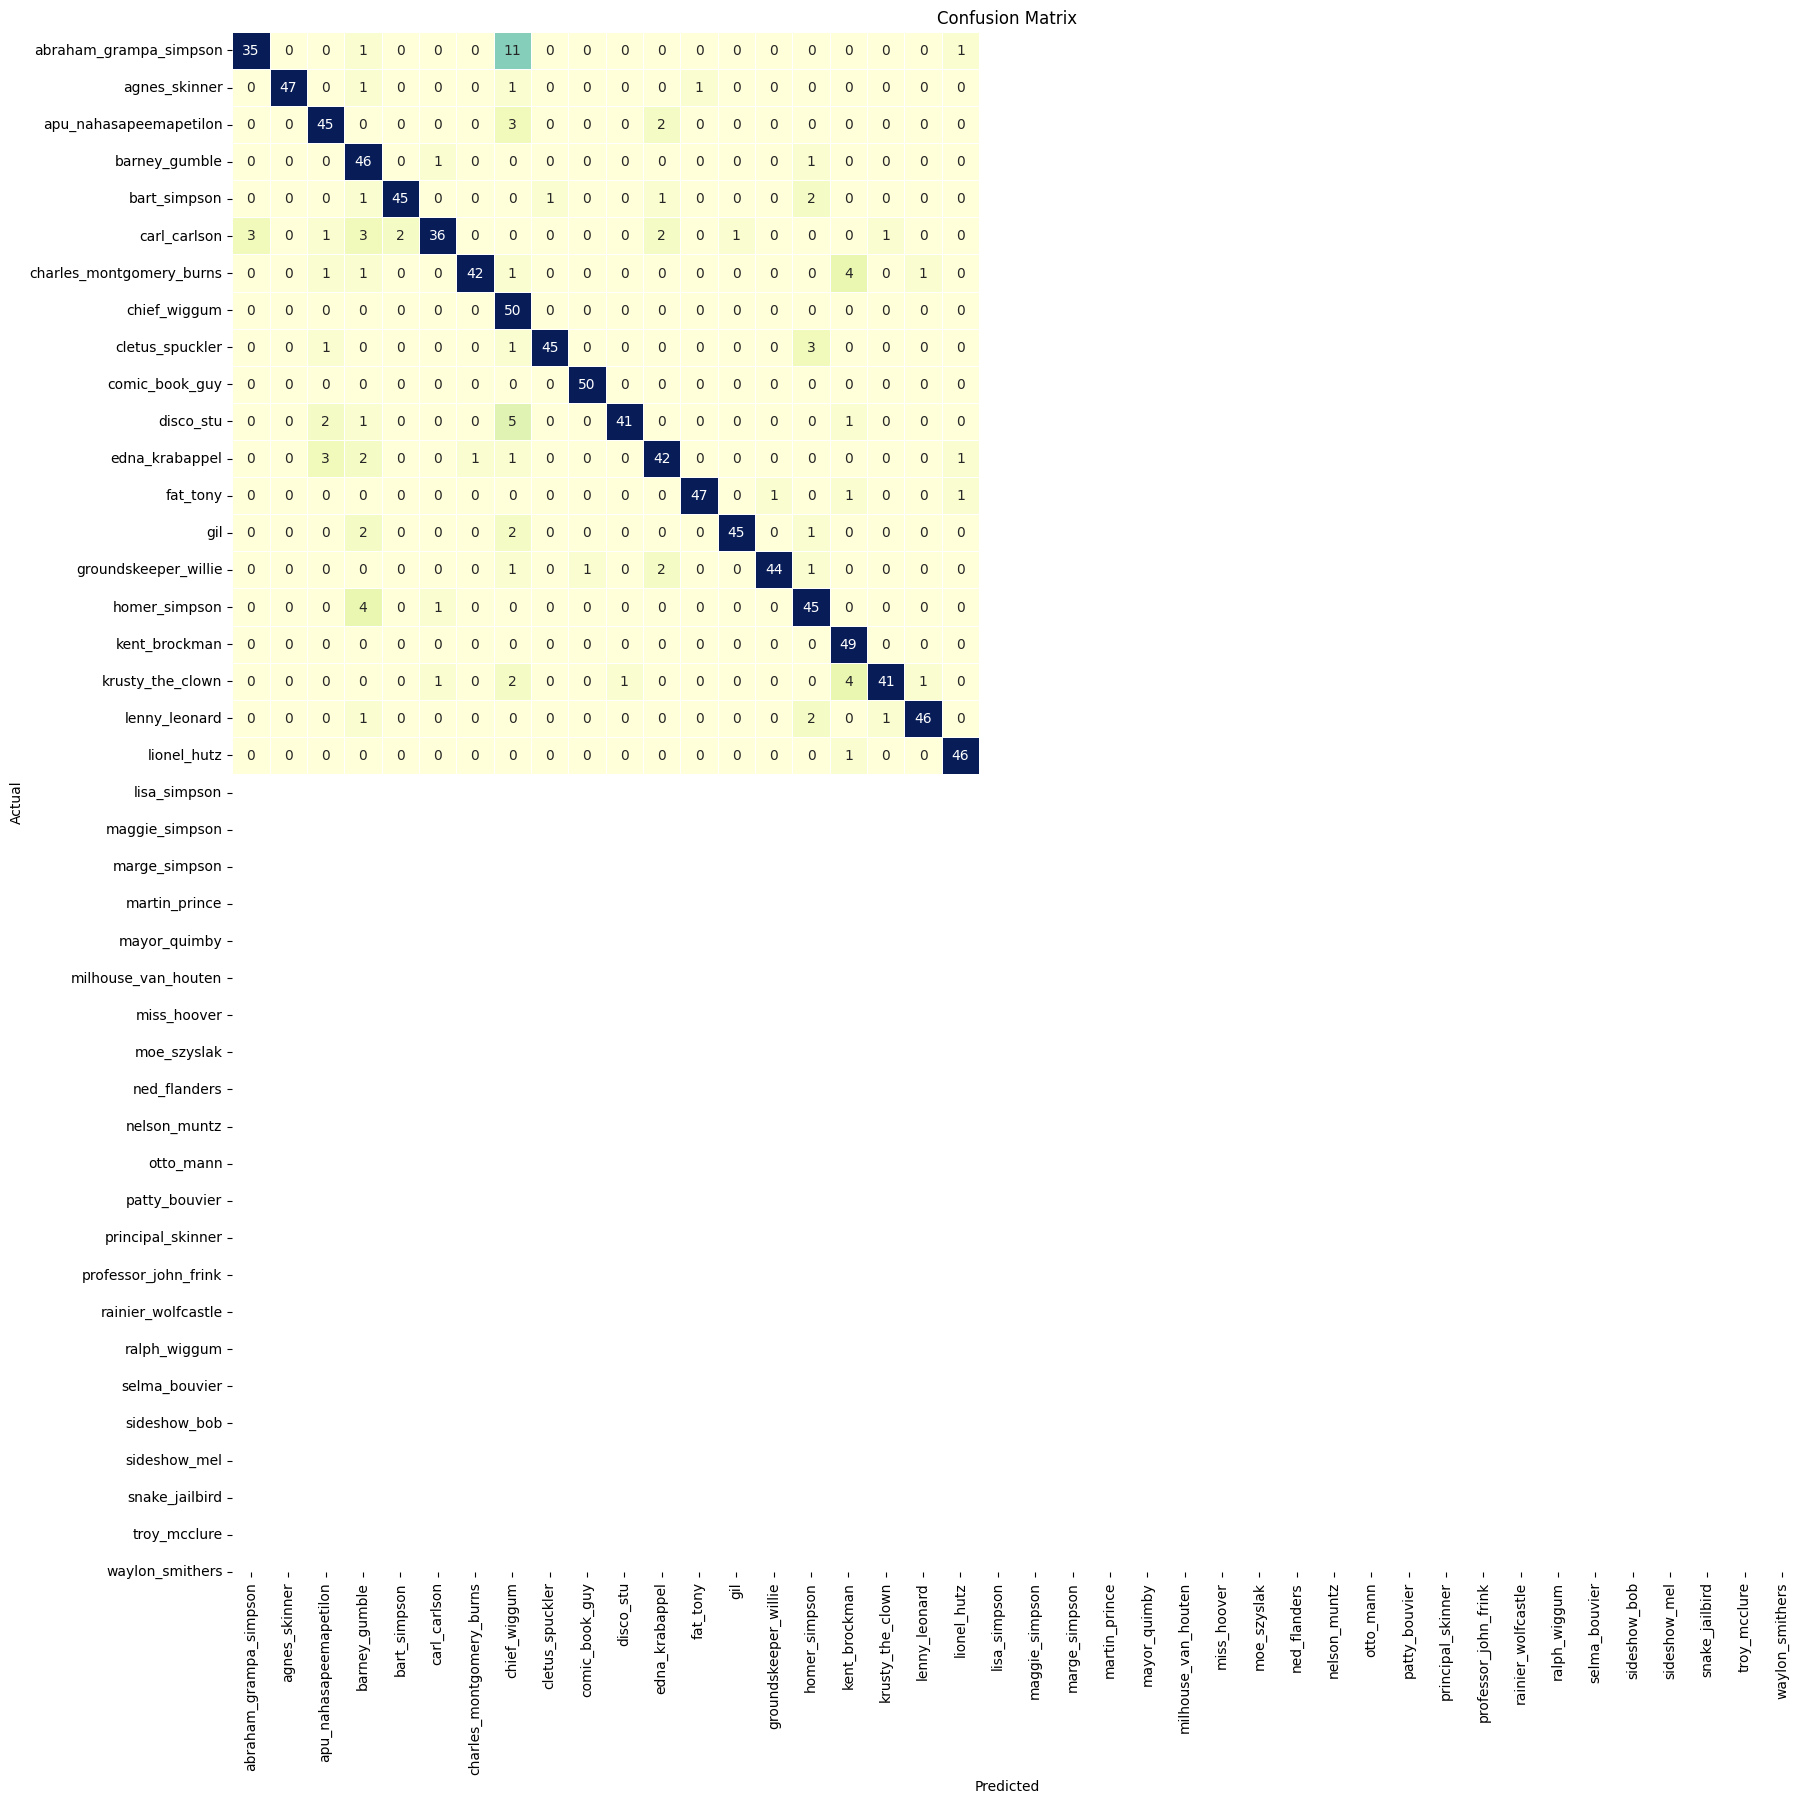

In [25]:
# Строим confusion_matrix
true_labels = [image_datasets_test[i][1] for i in range(len(image_datasets_test))]
build_confusion_matrix(model, dataloader_test, true_labels, image_datasets["train"].label_encoder.classes_, torch.device("cuda") if torch.cuda.is_available() else "cpu")

Теперь посмотрим, какие предикты мы получили (можно запускать несколько раз, будут разные картинки))

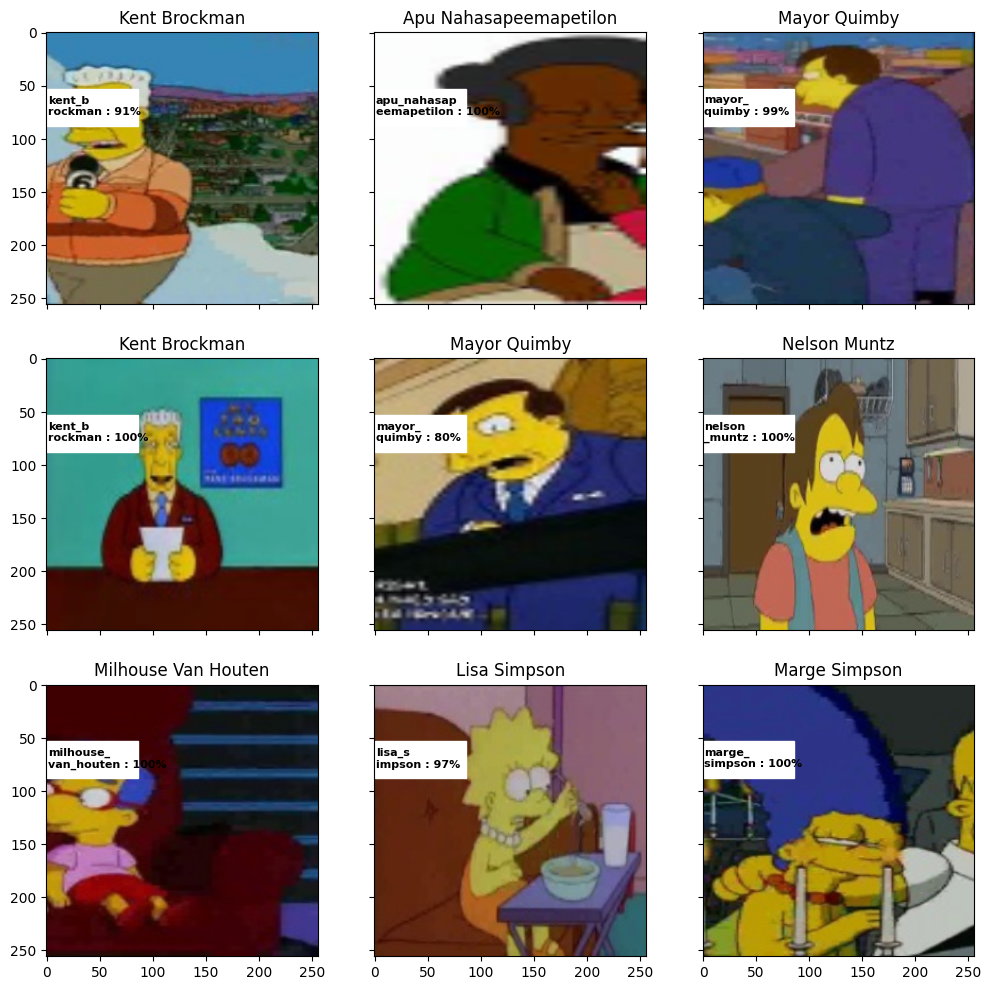

In [26]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), \
                        sharey=True, sharex=True)

label_encoder = image_datasets["train"].label_encoder

for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, 1000))
    im_val, label = image_datasets_test[random_characters]
    # inverse_transform это метод LabelEncoder(), мы закодировали цифрами классы, с помощью inverse_transform из чисел вернём название класса
    # получаем имя персонажа с заглавных букв
    img_label = " ".join(map(lambda x: x.capitalize(),\
                label_encoder.inverse_transform([label])[0].split('_')))

    imshow(im_val.data.cpu(), \
          title=img_label, plt_ax=fig_x)

    actual_text = "Actual : {}".format(img_label)

    # добавим область на которой будем выводить вероятность
    fig_x.add_patch(patches.Rectangle((0, 53), 86, 35, color='white'))
    font0 = FontProperties()
    font = font0.copy()
    prob_pred = predict_one_sample(model, im_val.unsqueeze(0))
    # получаем вероятность
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)

    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)

    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Ну все, теперь все по-взрослому)))

Теперь вместо обучения модели с нуля мы возьмём предобученный бэкбон (буквально позвоночник) — это основная часть сети, которая уже обучалась на огромном датасете (например, ImageNet) и умеет извлекать универсальные признаки из изображений: текстуры, формы, объекты и т.д.

Используя такой бэкбон, мы переносим уже накопленные знания на нашу задачу.
Обычно замораживают его слои (чтобы не менять предобученные веса) и обучают только новую классификационную голову — это быстрее и даёт лучшее качество, особенно на небольших датасетах.
При желании позже можно «разморозить» часть бэкбона и дообучить всю модель (fine-tuning).

В нашем случае мы возьмём ViT, заменим классификационную голову на новую под число персонажей и дообучим её

In [27]:
from transformers import ViTImageProcessor, ViTForImageClassification

# https://huggingface.co/google/vit-base-patch16-224
# Про архитектуру этой модели поговорим позже, когда узнаем про трансформеры)
model_name = "google/vit-base-patch16-224"
model_processor = ViTImageProcessor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [28]:
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=n_classes,
    ignore_mismatched_sizes=True
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([42]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([42, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [30]:
for name, param in model.named_parameters():
    # Замораживаем всё кроме классификационной головы, тут приветствуются эксперименты)
    if "classifier" not in name:
        param.requires_grad = False

In [31]:
class SimpsonsDatasetWithProcessor(Dataset):
    def __init__(self, files_path, processor=model_processor, is_test=False, label_encoder=None):
        self.files_path = files_path
        self.processor = processor
        self.is_test = is_test

        if not is_test:
            self.labels_str = [p.parent.name for p in self.files_path]
        else:
            self.labels_str = [extract_label_from_filename(p.name) for p in self.files_path]

        if label_encoder is None:
            self.label_encoder = LabelEncoder()
            self.label_encoder.fit(self.labels_str)
        else:
            self.label_encoder = label_encoder

    def __len__(self):
        return len(self.files_path)

    def __getitem__(self, idx):
        img_path = self.files_path[idx]
        image = Image.open(img_path).convert("RGB")
        inputs = self.processor(images=image, return_tensors="pt")
        image = inputs["pixel_values"].squeeze(0)

        label_str = self.labels_str[idx]
        label = self.label_encoder.transform([label_str]).item()

        return image, label

In [32]:
image_datasets = {mode: SimpsonsDatasetWithProcessor(train_val_paths[mode]) for mode in ['train', 'val']}
image_datasets_test = SimpsonsDatasetWithProcessor(test_path, is_test=True, label_encoder=image_datasets["train"].label_encoder)

batch_size = 32
dataloaders_dict = {'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4),
                    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=True, num_workers=4)}
dataloader_test = torch.utils.data.DataLoader(image_datasets_test, batch_size=batch_size, shuffle=False, num_workers=4)

In [33]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    """
    Базовый цикл обучения и валидации PyTorch-модели с переносом на выбранное устройство (CPU/GPU).

    Параметры
    ----------
    model : torch.nn.Module
        Обучаемая модель.
    dataloaders : dict
        Словарь с двумя ключами: 'train' и 'val'.
        Каждое значение — это DataLoader для соответствующей выборки.
    criterion : torch.nn.Module
        Функция потерь (например, nn.CrossEntropyLoss()).
    optimizer : torch.optim.Optimizer
        Оптимизатор (например, Adam или SGD).
    num_epochs : int, optional
        Количество эпох обучения (по умолчанию 25).

    Возвращает
    ----------
    model : torch.nn.Module
        Обученная модель (с весами после последней эпохи).
    history_val : dict
        История валидации: {'loss': [...], 'acc': [...]} по эпохам.
    history_train : dict
        История обучения: {'loss': [...], 'acc': [...]} по эпохам.
    """
    # Автоматически определяем устройство
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Переносим модель на устройство
    model = model.to(device)

    history_val = {'loss': [], 'acc': []}
    history_train = {'loss': [], 'acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 20)

        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()

            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

            for inputs, labels in tqdm.tqdm(dataloaders[phase], desc=phase):

                # Your code here. Все примерно то же самое, только немного по-другому предикты получаются, аккуратнее)
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    logits = outputs.logits
                    loss = criterion(logits, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                preds = torch.argmax(logits, dim=1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += inputs.size(0)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples


            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history_train['loss'].append(epoch_loss)
                history_train['acc'].append(epoch_acc.item())
            else:
                history_val['loss'].append(epoch_loss)
                history_val['acc'].append(epoch_acc.item())

        print()

    return model, history_val, history_train

In [34]:
criterion = nn.CrossEntropyLoss() # Your code here
optimizer = optim.AdamW(model.parameters(), lr=0.001) # Your code here

model, history_val, history_train = train_model(
    model, dataloaders_dict, criterion, optimizer, num_epochs=15
)

Using device: cuda
Epoch 1/15
--------------------


train: 100%|██████████| 458/458 [02:40<00:00,  2.85it/s]


train Loss: 1.7730 Acc: 0.5544


val: 100%|██████████| 197/197 [01:08<00:00,  2.88it/s]


val Loss: 1.2176 Acc: 0.7099

Epoch 2/15
--------------------


train: 100%|██████████| 458/458 [02:36<00:00,  2.93it/s]


train Loss: 1.0079 Acc: 0.7471


val: 100%|██████████| 197/197 [01:08<00:00,  2.90it/s]


val Loss: 0.9647 Acc: 0.7568

Epoch 3/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.91it/s]


train Loss: 0.7755 Acc: 0.8044


val: 100%|██████████| 197/197 [01:07<00:00,  2.90it/s]


val Loss: 0.8452 Acc: 0.7847

Epoch 4/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.91it/s]


train Loss: 0.6485 Acc: 0.8378


val: 100%|██████████| 197/197 [01:08<00:00,  2.90it/s]


val Loss: 0.7822 Acc: 0.7952

Epoch 5/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.90it/s]


train Loss: 0.5652 Acc: 0.8576


val: 100%|██████████| 197/197 [01:08<00:00,  2.89it/s]


val Loss: 0.7458 Acc: 0.8051

Epoch 6/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.91it/s]


train Loss: 0.5017 Acc: 0.8760


val: 100%|██████████| 197/197 [01:08<00:00,  2.89it/s]


val Loss: 0.7259 Acc: 0.8068

Epoch 7/15
--------------------


train: 100%|██████████| 458/458 [02:38<00:00,  2.90it/s]


train Loss: 0.4546 Acc: 0.8881


val: 100%|██████████| 197/197 [01:07<00:00,  2.90it/s]


val Loss: 0.6943 Acc: 0.8172

Epoch 8/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.91it/s]


train Loss: 0.4174 Acc: 0.9009


val: 100%|██████████| 197/197 [01:07<00:00,  2.90it/s]


val Loss: 0.6981 Acc: 0.8142

Epoch 9/15
--------------------


train: 100%|██████████| 458/458 [02:36<00:00,  2.92it/s]


train Loss: 0.3849 Acc: 0.9086


val: 100%|██████████| 197/197 [01:08<00:00,  2.88it/s]


val Loss: 0.6735 Acc: 0.8240

Epoch 10/15
--------------------


train: 100%|██████████| 458/458 [02:36<00:00,  2.92it/s]


train Loss: 0.3581 Acc: 0.9165


val: 100%|██████████| 197/197 [01:07<00:00,  2.91it/s]


val Loss: 0.6711 Acc: 0.8252

Epoch 11/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.91it/s]


train Loss: 0.3363 Acc: 0.9208


val: 100%|██████████| 197/197 [01:08<00:00,  2.89it/s]


val Loss: 0.6610 Acc: 0.8256

Epoch 12/15
--------------------


train: 100%|██████████| 458/458 [02:36<00:00,  2.92it/s]


train Loss: 0.3153 Acc: 0.9263


val: 100%|██████████| 197/197 [01:07<00:00,  2.90it/s]


val Loss: 0.6677 Acc: 0.8256

Epoch 13/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.91it/s]


train Loss: 0.2953 Acc: 0.9338


val: 100%|██████████| 197/197 [01:08<00:00,  2.90it/s]


val Loss: 0.6789 Acc: 0.8204

Epoch 14/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.91it/s]


train Loss: 0.2802 Acc: 0.9365


val: 100%|██████████| 197/197 [01:07<00:00,  2.90it/s]


val Loss: 0.6743 Acc: 0.8266

Epoch 15/15
--------------------


train: 100%|██████████| 458/458 [02:37<00:00,  2.90it/s]


train Loss: 0.2655 Acc: 0.9404


val: 100%|██████████| 197/197 [01:08<00:00,  2.87it/s]

val Loss: 0.6646 Acc: 0.8287



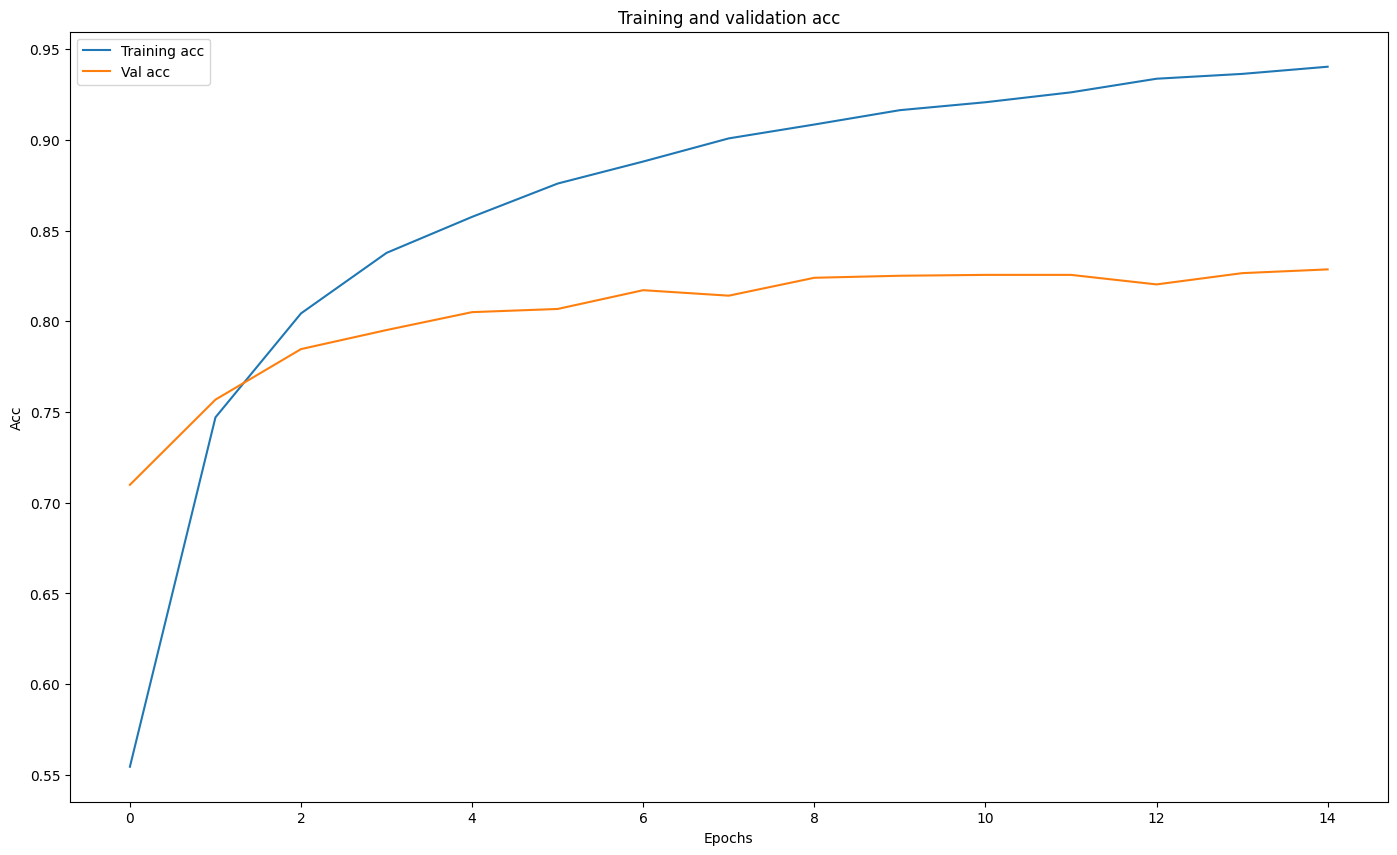

In [35]:
visualization(history_train["acc"], history_val["acc"], is_loss = False)

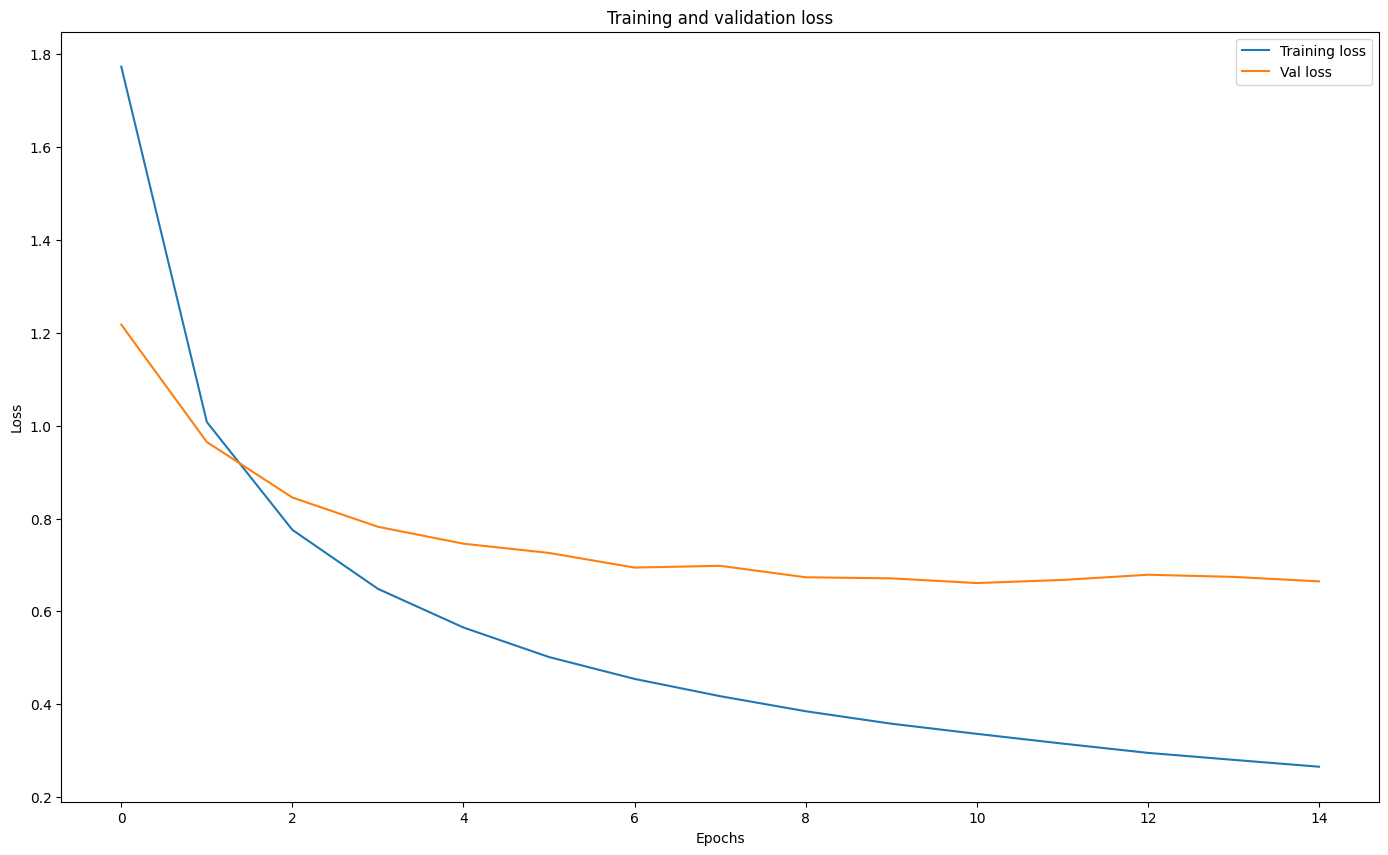

In [36]:
visualization(history_train["loss"], history_val["loss"], is_loss = True)

In [38]:
true_labels = [image_datasets_test[i][1] for i in range(len(image_datasets_test))]

def build_confusion_matrix(model, dataloader, true_labels, class_names, device):
    model.eval()
    all_preds = []

    with torch.no_grad():
        for inputs, _ in tqdm.tqdm(dataloader, desc="Predicting"):
            inputs = inputs.to(device)
            outputs = model(inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())

# whooops, кажется тут тоже кое-что поменять надо)) логиты чучут по-другому получаются
build_confusion_matrix(
    model,
    dataloader_test,
    true_labels,
    image_datasets['train'].label_encoder.classes_,
    torch.device("cuda") if torch.cuda.is_available() else "cpu")

Predicting: 100%|██████████| 31/31 [00:10<00:00,  2.97it/s]


In [40]:
def predict_one_sample(model, image):
    model.eval()
    image = image.to("cuda")

    with torch.no_grad():
        outputs = model(image)
        probabilities = F.softmax(outputs.logits, dim=1)

    return probabilities.cpu().numpy()[0]

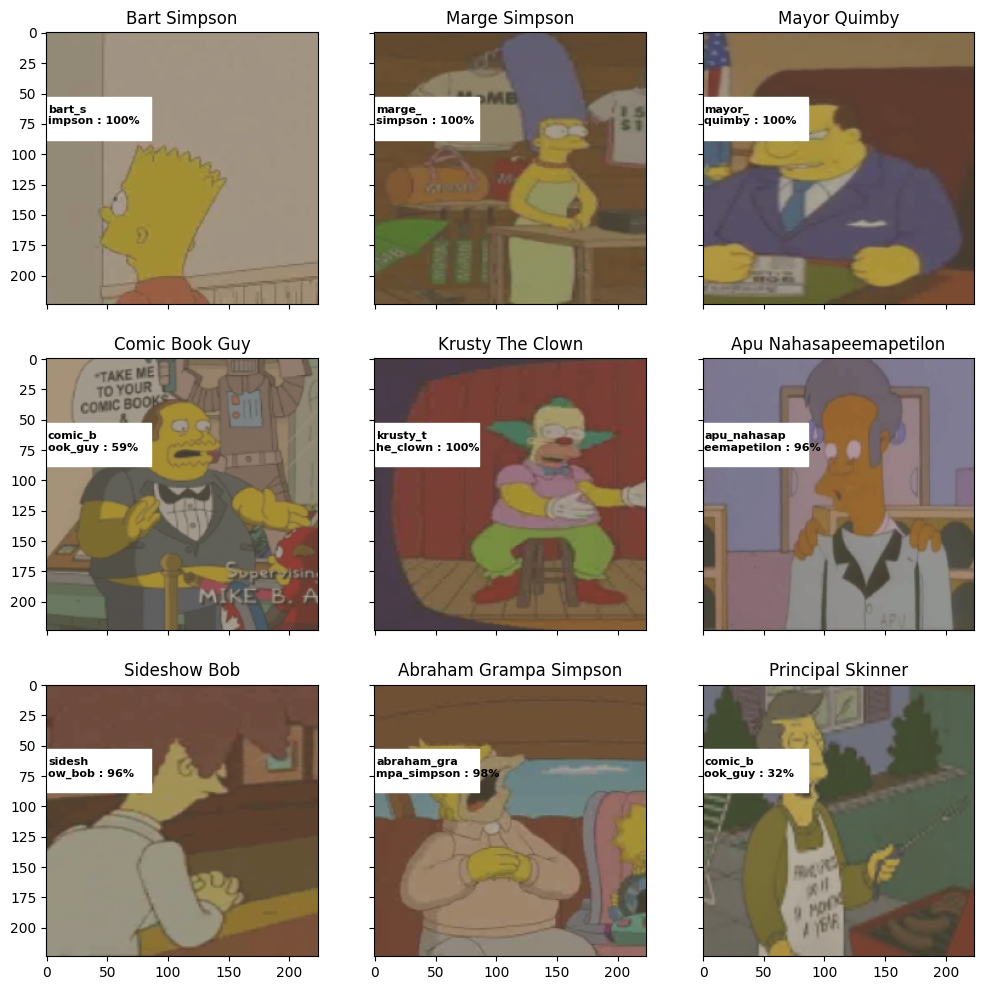

In [41]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), \
                        sharey=True, sharex=True)

label_encoder = image_datasets['train'].label_encoder

for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, 1000))
    im_val, label = image_datasets_test[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                label_encoder.inverse_transform([label])[0].split('_')))

    imshow(im_val.data.cpu(), \
          title=img_label, plt_ax=fig_x)

    actual_text = "Actual : {}".format(img_label)

    fig_x.add_patch(patches.Rectangle((0, 53), 86, 35, color='white'))
    font0 = FontProperties()
    font = font0.copy()
    prob_pred = predict_one_sample(model, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)

    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)

    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')